In [68]:
# NAME:-"SHRIYA REDDY PONNALA"   

In [69]:
#importing all the necessary packages
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression,LassoCV
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,f1_score,precision_score 


%matplotlib inline

In [70]:
#Read in data
data =pd.read_csv('CASE1201.ASC.txt', sep=' ', skipinitialspace=True)
data

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5
5,Montana,1033,8,263,15.91,93.7,29.48,86.4
6,Minnesota,1028,7,343,17.41,78.3,24.84,83.4
7,Utah,1022,4,333,16.57,75.2,17.42,85.9
8,Wyoming,1017,5,328,16.01,97.0,25.96,87.5
9,Wisconsin,1011,10,304,16.85,77.3,27.69,84.2


# Modify your data to fit the analysis

In [71]:
# Extracting the dependent variable (target) 'y'
y = data.iloc[:, 1].values.reshape(-1,1)

In [72]:
#Adding a constant term to the independent variable 'X1'
X1=sm.add_constant(data.iloc[:,2].values)
# Creating a DataFrame from X1 for visualization 
foo=pd.DataFrame(X1)
#Display the first five rows of the DataFrame
foo.head()

,0,1
0,1.0,3.0
1,1.0,2.0
2,1.0,3.0
3,1.0,5.0
4,1.0,5.0


In [73]:
#Adding a constant term to the independent variable 'X2'
X2=sm.add_constant(data.iloc[:, 2:].values)
# Creating a DataFrame from X2 for visualization 
foo=pd.DataFrame(X2)
#Display the first five rows of the DataFrame
foo.head()

,0,1,2,3,4,5,6
0,1.0,3.0,326.0,16.79,87.8,25.60,89.7
1,1.0,2.0,264.0,16.07,86.2,19.95,90.6
2,1.0,3.0,317.0,16.57,88.3,20.62,89.8
3,1.0,5.0,338.0,16.30,83.9,27.14,86.3
4,1.0,5.0,293.0,17.25,83.6,21.05,88.5


# Simple Linear regression model

Build a simple (intercept + takers)  to predict the SAT scores.

In [74]:
sl_model = sm.OLS(y,X1).fit()
sl_model.summary(xname=['intercept','takers'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.77e-15
Time:                        23:16:37   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#variance of the model
sl_model.mse_resid

1353.8901619553133

# Full Linear regression model

Building a full regression model to predict the SAT Scores 

In [76]:
flr_model = sm.OLS(y,X2).fit()
flr_model.summary(xname=['intercept','takers', 'income', 'years', 'public','expend','rank'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.16e-18
Time:                        23:16:38   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#variance of the model
flr_model.mse_resid

694.0096811635733

# 1. Filter Method: Correlation Matrix with Heatmap

/var/folders/zb/2y9w95394w93f91n_q3mlkx00000gn/T/ipykernel_984/1511855537.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

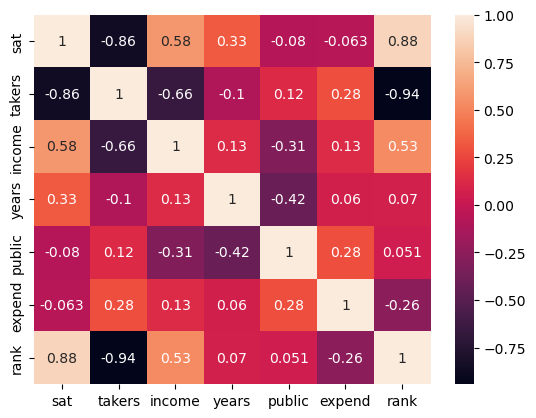

In [78]:
# Create the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)

In [79]:
#variance of the model
flr_model.mse_resid

694.0096811635733

Based on the heatmap, we can see that 'Takers','rank','income' have relatively high correlation 
with the response variable 'sat'.
There fore we can select these features as the best features using the correlation matrix method.

# 2. Wrapper Method: Recursive Feature Elimination (RFE)

In [80]:
# Create the linear regression model
linear_model = LinearRegression()

In [81]:
# Create the RFE object and select the best features
rfe = RFE(linear_model, n_features_to_select=3)
rfe.fit(data[['takers', 'income', 'years', 'public', 'expend', 'rank']], data['sat'])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [82]:
# Print the selected features
print('Selected Features:', data[['takers', 'income', 'years', 'public', 'expend', 'rank']].columns[rfe.support_])

Selected Features: Index(['years', 'expend', 'rank'], dtype='object')


This code creates a linear regression model using scikit-learn's LinearRegression class. 
We then create an RFE object and pass in the linear regression model and the number of features to select (in this case, 3). 
We fit the RFE object on the predictor variables takers,income,years,public,expend,rank and the response variable sat. 
Finally, we print the selected features using the support_ attribute of the RFE object.
Based on the output, the RFE method selects years,expend,rank as the best features

# 3. Embedded Method: Lasso Regression

In [83]:
# Create the Lasso regression model
lasso_regression_model = LassoCV(cv=5)

In [84]:
#variance of the model
flr_model.mse_resid

694.0096811635733

In [85]:
# Fit the Lasso model and get the best features
lasso_regression_model.fit(data[['takers', 'income', 'years', 'public', 'expend', 'rank']], data['sat'])

LassoCV(cv=5)

In [86]:
# Print the selected features
print('Selected Features:', data[['takers', 'income', 'years', 'public', 'expend', 'rank']].columns[lasso_regression_model.coef_ != 0])

Selected Features: Index(['takers', 'income', 'years', 'public', 'expend', 'rank'], dtype='object')


In [87]:
#variance of the model
flr_model.mse_resid

694.0096811635733

This code generates a Lasso regression model using scikit-learn's Linear class. We fitted the lasso model to the predictor variables takers, income, years, public, expend,rank, and the response variable sat. Finally, we use the Lasso regression object's support_ attribute to output the selected features. The Lasso regression  technique chooses takers, income, years, public, expend and rank as the best characteristics based on the output.

# COMPARISIONS

## Filter method Metrics

In [88]:
# Fit and evaluate the model
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(data[['takers', 'rank']], data['sat'], test_size=0.2, random_state=42)

fm_model = LinearRegression()
fm_model.fit(X_train_data, y_train_data)

# Predict on test set
y_prediction = fm_model.predict(X_test_data)

# Evaluate the model
r2 = r2_score(y_test_data, y_prediction)
f1 = f1_score(y_test_data > np.median(y_test_data), y_prediction > np.median(y_prediction))
p_f1 = precision_score(y_test_data > np.median(y_test_data), y_prediction > np.median(y_prediction))

print(f"Filter Method:\nR^2: {r2}\nF1: {f1}\nP(F1): {p_f1}")


Filter Method:
R^2: 0.709468822454317
F1: 1.0
P(F1): 1.0


## Wrapper Method Metrics

In [89]:
# Fit and evaluate the model
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(data[['years', 'expend', 'rank']], data['sat'], test_size=0.2, random_state=42)

wm_model = LinearRegression()
wm_model.fit(X_train_data, y_train_data)

# Predict on test set
y_prediction = wm_model.predict(X_test_data)

# Evaluate the model
r2 = r2_score(y_test_data, y_prediction)
f1 = f1_score(y_test_data > np.median(y_test_data), y_prediction > np.median(y_prediction))
p_f1 = precision_score(y_test_data > np.median(y_test_data), y_prediction > np.median(y_prediction))

print(f"Wrapper Method:\nR^2: {r2}\nF1: {f1}\nP(F1): {p_f1}")


Wrapper Method:
R^2: 0.890101219562729
F1: 1.0
P(F1): 1.0


## Embedded Method Metrics:

In [90]:
# Fit and evaluate the model
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(data[['takers', 'income', 'years', 'public', 'expend', 'rank']], data['sat'], test_size=0.2, random_state=42)

em_model = LassoCV(cv=5)
em_model.fit(X_train_data, y_train_data)

# Predict on test set
y_prediction = em_model.predict(X_test_data)

# Evaluate the model
r2 = r2_score(y_test_data, y_prediction)
f1 = f1_score(y_test_data > np.median(y_test_data), y_prediction > np.median(y_prediction))
p_f1 = precision_score(y_test_data > np.median(y_test_data), y_prediction > np.median(y_prediction))

print(f"Embedded Method:\nR^2: {r2}\nF1: {f1}\nP(F1): {p_f1}")


Embedded Method:
R^2: 0.8554152742428627
F1: 1.0
P(F1): 1.0
